In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
percent_stats = pd.read_csv("percent_stats.csv")

In [3]:
# Define the selected features for the percentage model
percent_selected_features = ['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '3P%', '2P%', 'FT%']

#Define X and y sets
X = percent_stats[percent_selected_features]
y = percent_stats["Pos"]

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Print the X_train dataframe
X_train.head()

,TRB%,AST%,STL%,BLK%,TOV%,USG%,3P%,2P%,FT%
14993,5.6,9.3,0.9,0.2,10.3,19.9,0.337,0.481,0.841
3371,14.8,3.5,0.6,2.1,16.9,13.6,0.000,0.532,0.721
2400,5.2,30.9,1.1,0.7,19.8,20.5,0.333,0.438,0.806
15957,16.3,16.2,1.6,3.2,18.8,17.1,0.000,0.520,0.642
3029,6.0,30.7,3.1,0.5,22.1,18.8,0.167,0.244,0.765


In [4]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [5]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.998/0.545
k: 3, Train/Test Score: 0.763/0.564
k: 5, Train/Test Score: 0.715/0.596
k: 7, Train/Test Score: 0.700/0.609
k: 9, Train/Test Score: 0.688/0.611
k: 11, Train/Test Score: 0.678/0.612
k: 13, Train/Test Score: 0.669/0.622
k: 15, Train/Test Score: 0.662/0.623
k: 17, Train/Test Score: 0.660/0.625
k: 19, Train/Test Score: 0.656/0.621


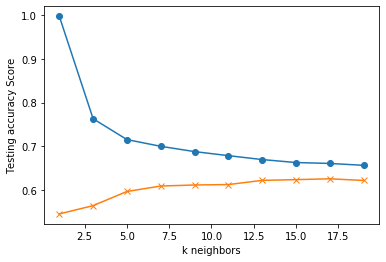

In [8]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.612
